In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from joblib import dump
from joblib import load,dump
import pickle
import os
import cv2
print(os.getcwd())
print(os.listdir("../baldness"))
 #write to the current directory are saved as output.

C:\Users\1294414\Documents\ML practice folder\Baldness
['.ipynb_checkpoints', 'anuj', 'Bald', 'bald.jpg', 'bald2.jpg', 'bald3.jpg', 'baldnes.ipynb', 'data.csv', 'hair.jpg', 'image.jpg', 'nik.png', 'Normal', 'randomForest.model', 'shubam.jpg', 'svc_clf_128.model', 'Ximage.images', 'Yimage.classes']


In [2]:
#print(os.listdir("../input/chest_xray/chest_xray/train/NORMAL"))
classes = {"Bald":0,"Normal":1}


In [3]:
#train_data =[]

def getpathclass(folderName=None):
    data_list =[]
    foldername = folderName
    if folderName != None:
        folder_path = os.path.join("../baldness",str(folderName))
        #print(folder_path)
        for images in os.listdir(folder_path):
            #print(type(foldername))
            #print(foldername)
            if foldername == str("Bald"):
                folder_path_bald = os.path.join(folder_path,images)
                data_list.append([os.path.abspath(folder_path_bald),classes["Bald"]])
            if foldername == "Normal":
                folder_path_normal = os.path.join(folder_path,images)
                data_list.append([os.path.abspath(folder_path_normal),classes["Normal"]])
        return data_list    
    else:    #print(len(train_data))            
        return data_list

In [4]:
bald_data = getpathclass("Bald")
normal_data = getpathclass("Normal")

In [5]:
#print(len(train_data))
#df_bald = pd.DataFrame()
df_bald = pd.DataFrame(bald_data,columns=["PATH","CLASS"])
df_normal = pd.DataFrame(normal_data,columns=["PATH","CLASS"])

In [6]:
df_data_complete = pd.concat([df_bald,df_normal],ignore_index=True)
#print(df_data_complete)

In [7]:
df_data_complete.to_csv("data.csv")


In [8]:

#df_data_complete.columns
print(df_data_complete.PATH[0])

C:\Users\1294414\Documents\ML practice folder\baldness\Bald\15-simple-hairstyle-for-receding-hairline.png


[[[223 220 216]
  [223 220 216]
  [223 220 216]
  ...
  [222 220 220]
  [222 220 220]
  [222 221 217]]

 [[223 220 216]
  [223 220 216]
  [223 220 216]
  ...
  [222 220 220]
  [222 220 220]
  [222 220 219]]

 [[224 221 217]
  [224 221 217]
  [224 221 217]
  ...
  [222 220 220]
  [222 220 220]
  [222 220 220]]

 ...

 [[214 214 214]
  [214 214 214]
  [214 214 214]
  ...
  [217 218 216]
  [215 218 216]
  [216 217 215]]

 [[214 214 214]
  [214 214 214]
  [214 214 214]
  ...
  [217 218 216]
  [215 218 216]
  [216 217 215]]

 [[214 214 214]
  [214 214 214]
  [214 214 214]
  ...
  [217 218 216]
  [215 218 216]
  [216 217 215]]]
0


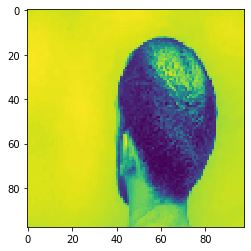

(98, 98)

In [9]:
#print(train_df.PATH[1700])
image_h,image_w = [98,98]
img = cv2.imread(str(df_data_complete.PATH[2]))
print(img)
print(df_data_complete.CLASS[0])

#img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#(thresh, img) = cv2.threshold(img,127, 255, cv2.THRESH_TRUNC)
img = cv2.resize(img,(image_w,image_h))

plt.imshow(img)
plt.show()
img.shape

In [10]:


X = []
for imgpath in df_data_complete.PATH.tolist():
    
    X.append(cv2.resize(cv2.imread(imgpath,0),(image_w,image_h)).flatten()/255)
    #print(len(train_image_x))


In [11]:
y = df_data_complete.CLASS

In [12]:
dump(X,"Ximage.images")
dump(y,"Yimage.classes")

['Yimage.classes']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23, random_state=42)


In [14]:
#a = train_image_x[0]

In [15]:
#a.shape

In [22]:
clfsvc = SVC(verbose=True,C=1.5,kernel="linear")

In [23]:
clfsvc.fit(X_train,y_train)

[LibSVM]

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [24]:
clfsvc2 = SVC(verbose=True,C=1.0,kernel="rbf")
clfsvc2.fit(X_train,y_train)

C:\Users\1294414\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [25]:
accuracy_score(y_true=y_test,y_pred=clfsvc.predict(X_test))

0.851063829787234

In [26]:
accuracy_score(y_true=y_test,y_pred=clfsvc2.predict(X_test))

0.7659574468085106

In [59]:
# random Forest classifier
clf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=1)

In [60]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [61]:
#from joblib import dump,load
#dump(clf, 'svc_clf_128.model')

dump(clf,'randomForest.model')

['randomForest.model']

In [62]:
#clf_test = load("../working/svc_clf_.model")
# model_file = "model.sav"
# with open(model_file,mode='wb') as model_f:
#     pickle.dump(clf,model_f)
# with open(model_file,mode='rb') as model_f:
#     model = pickle.load(model_f)
#     #result = model.score(X_test,Y_test)
#     print("result:","result")

In [28]:
#os.listdir("../working")

clf_randomForest = load('randomForest.model')
clf_svc = load('svc_clf_128.model')

In [73]:
#randomforest accuracy score on train data
train_rf_accu = accuracy_score(y_true=y_train,y_pred=clf_randomForest.predict(X_train))

In [74]:
#randomforest accuracy score on test data
test_rf_accu = accuracy_score(y_true=y_test,y_pred=clf_randomForest.predict(X_test))

In [75]:
#svm accuracy score on train data
train_svc_accu = accuracy_score(y_true=y_train,y_pred=clf_svc.predict(X_train))

In [76]:
#svm accuracy score  on test data
test_svc_accu =accuracy_score(y_true=y_test,y_pred=clf_svc.predict(X_test))

In [68]:
#tn, fp, fn, tp =metrics.confusion_matrix(y_pred=clf.predict(test_image_x),y_true=test_y).ravel()

In [69]:
#tn, fp, fn, tp

In [70]:
###-------- now we will  apply factorize machine ------####



[[[214 207 204]
  [214 207 204]
  [214 207 204]
  ...
  [212 205 202]
  [212 205 202]
  [212 205 202]]

 [[215 207 204]
  [215 207 204]
  [215 207 204]
  ...
  [212 205 202]
  [212 205 202]
  [212 205 202]]

 [[216 207 204]
  [216 207 204]
  [216 207 204]
  ...
  [212 205 202]
  [212 205 202]
  [212 205 202]]

 ...

 [[126 155 159]
  [126 155 159]
  [126 155 160]
  ...
  [ 74  79  83]
  [ 75  81  85]
  [ 75  81  86]]

 [[124 153 158]
  [124 153 158]
  [125 154 159]
  ...
  [ 76  81  85]
  [ 78  83  87]
  [ 78  83  88]]

 [[123 152 157]
  [123 152 157]
  [124 153 158]
  ...
  [ 77  81  86]
  [ 79  83  88]
  [ 79  83  88]]]
0


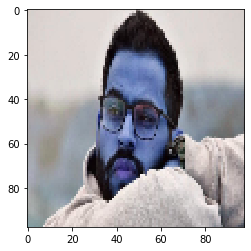

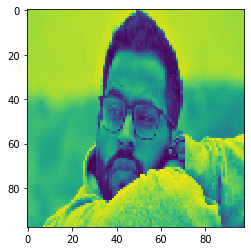

Not Bald


In [29]:
#C:\Users\1294414\Documents\ML practice folder\Baldness
imagepath = "C:\\Users\\1294414\\Documents\\ML practice folder\\Baldness\\nik.png"
image_h,image_w = [98,98]
img = cv2.imread(imagepath)

print(img)
print(df_data_complete.CLASS[0])
#print(img)
#img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(image_w,image_h))
plt.imshow(img)
plt.show()
img.shape
import matplotlib.image as mpimg
from skimage.color import rgb2gray
img=mpimg.imread(imagepath)
img = rgb2gray(img)
#img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(image_w,image_h))
plt.imshow(img)
plt.show()


shubamX = []
shubamX.append(cv2.resize(cv2.imread(imagepath,0),(image_w,image_h)).flatten()/255)
shubamY = [1]

if clf_randomForest.predict(shubamX)[0] == 0:
    print("Bald")
if clf_randomForest.predict(shubamX)[0] == 1:
    print("Not Bald")

In [72]:
#clf = load('randomForest.model')

In [30]:
#x=[train_rf_accu,test_rf_accu,train_svc_accu,test_svc_accu]
#print(x)
y=[train_rf_accu,test_rf_accu,train_svc_accu,test_svc_accu]
sns.set_context(rc={"figure.figsize": (8, 4)})
nd = np.arange(4)
width=.25
plt.xticks(nd+width/2., ('train_RF_accu','test_RF_accu','train_SVM_accu','test_SVM_accu'))
#plt.xlim(-0.15,3)
fig = plt.bar(nd, y, color=sns.color_palette("Blues",4))
plt.legend(fig, ['train_RF_accu','test_RF_accu','train_SVM_accu','test_SVM_accu'], loc = "best", title = "Accuracy PLot")
plt.ylabel("Accuracy")
plt.xlabel("Alogrithm & Data type")
plt.show()

NameError: name 'train_rf_accu' is not defined